In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
#Load Dataset
df = pd.read_csv('world-data-2023.csv')

In [4]:
# Data Type Conversion:
# Columns to convert to float
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

# Convert columns using a lambda function
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))




Handling missing values

In [5]:
# List of columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

Data Visualization

Top 20 Countries: Highest Unemployment

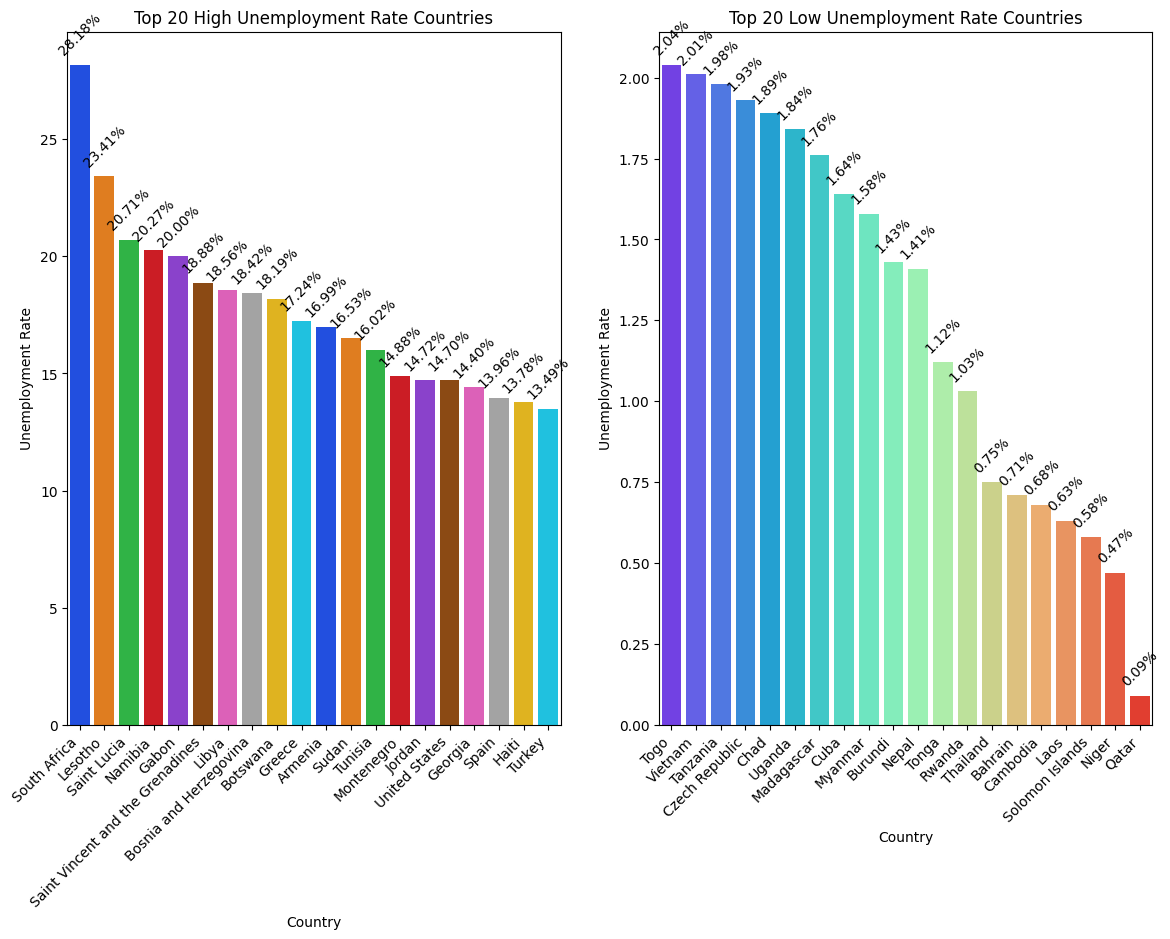

In [6]:
sorted_df = df.sort_values(by = 'Unemployment rate', ascending = False)

top_high_unemployment = sorted_df.head(20)
top_low_unemployment = sorted_df.tail(20)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for high unemployment countries
sns.barplot(data=top_high_unemployment, x='Country', y='Unemployment rate', palette='bright', ax=axes[0])
axes[0].set_title('Top 20 High Unemployment Rate Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Plot for low unemployment countries
sns.barplot(data=top_low_unemployment, x='Country', y='Unemployment rate', palette='rainbow', ax=axes[1])
axes[1].set_title('Top 20 Low Unemployment Rate Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Show the plots
plt.show()



Top 20 Countries: Highest Population

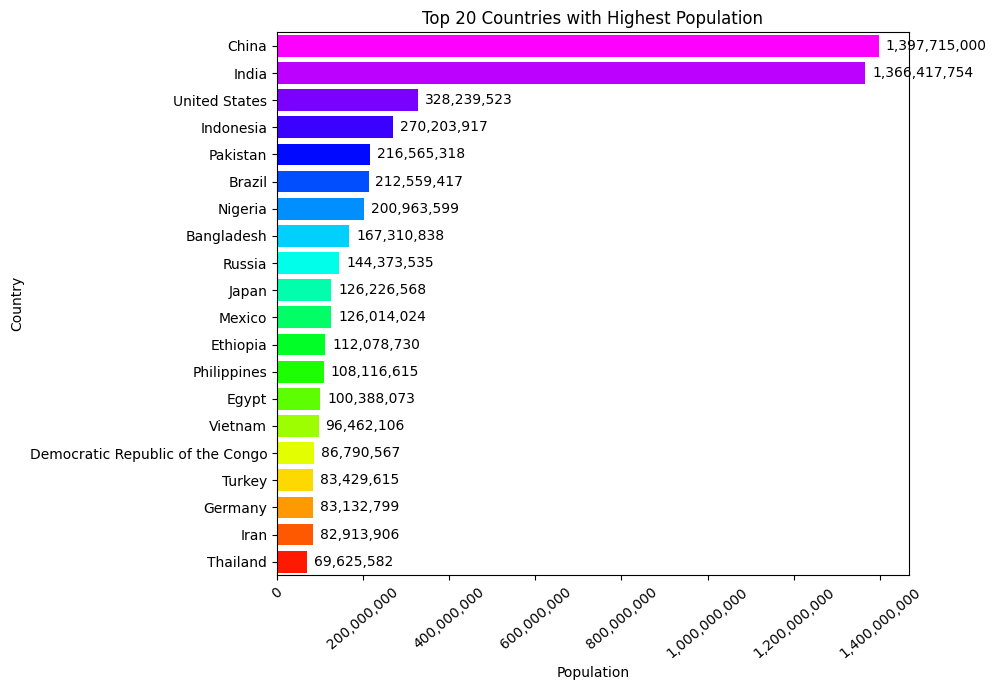

In [7]:
import matplotlib.ticker as ticker

sorted_df = df.sort_values(by='Population', ascending=False)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
axes.set_title('Top 20 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


Top 20 Countries: Highest Birth Rates

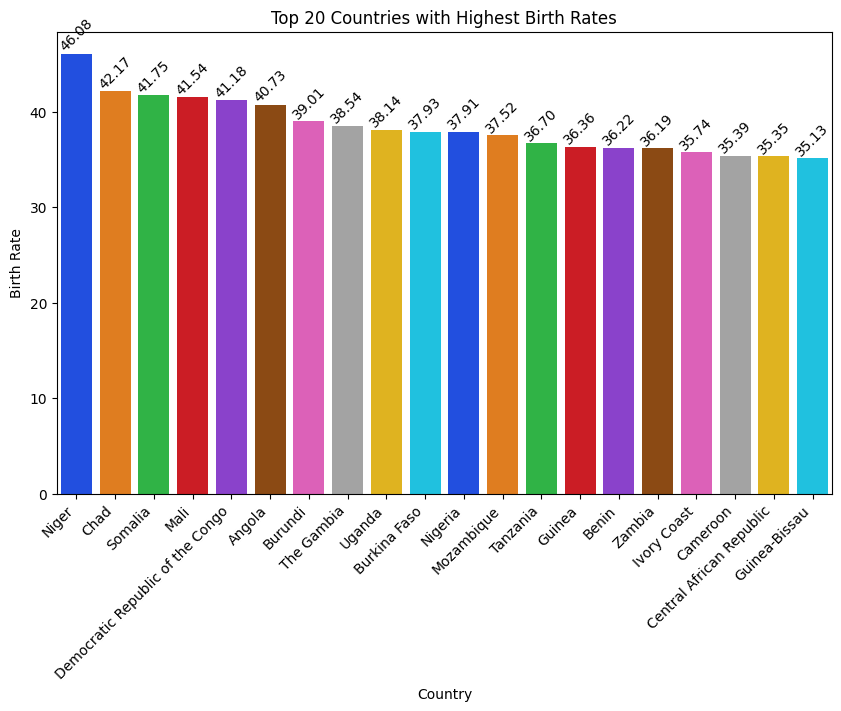

In [8]:
# Sort the dataframe by 'Birth Rate' column in descending order
sorted_df = df.sort_values(by='Birth Rate', ascending=False)

# Get the top 20 countries with the highest birth rates
top_country_birth = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with high birth rates
plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_birth, x='Country', y='Birth Rate', palette='bright')

# Add title and labels
plt.title('Top 20 Countries with Highest Birth Rates')
plt.xlabel('Country')
plt.ylabel('Birth Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display data labels on top of each bar
for index, value in enumerate(top_country_birth['Birth Rate']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation = 45)

# Show the plot
plt.show()



Top 20 Countries: Highest Agricultural

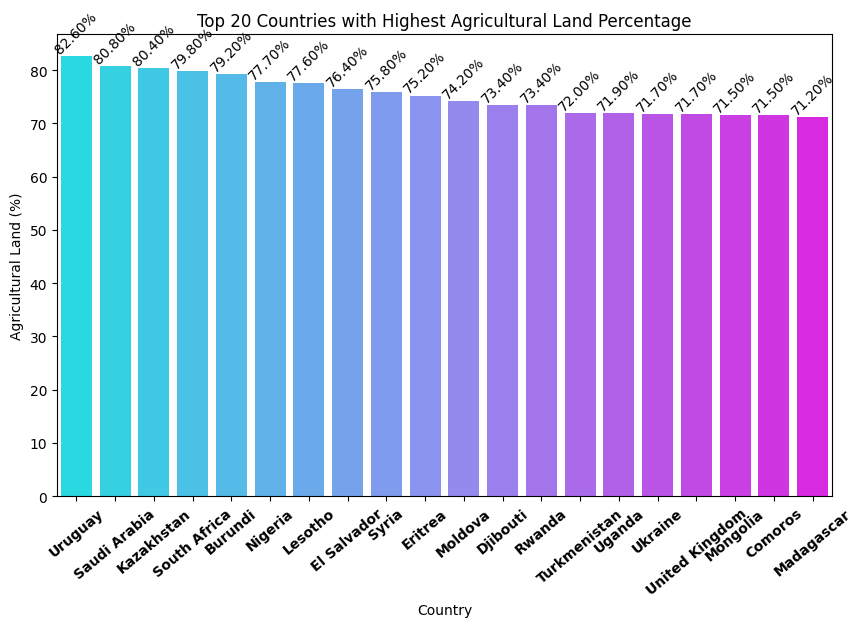

In [9]:
# Sort the dataframe by 'Agricultural Land (%)' column in descending order
sorted_df = df.sort_values(by='Agricultural Land( %)', ascending=False)

# Get the top 20 countries with the highest agricultural land percentages
top_country_Agri = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with high agricultural land percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_Agri, x='Country', y='Agricultural Land( %)', palette='cool')

# Add title and labels
plt.title('Top 20 Countries with Highest Agricultural Land Percentage')
plt.xlabel('Country')
plt.ylabel('Agricultural Land (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40,fontweight = 'bold',fontsize = 10 )

# Annotate the bars with actual values
for index, value in enumerate(top_country_Agri['Agricultural Land( %)']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10 , rotation = 45)


# Show the plot
plt.show()


Top 20 Countries: Largest Armed Forces

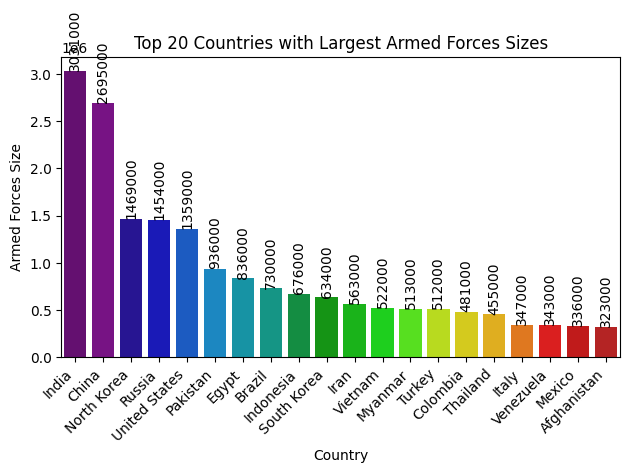

In [10]:
# Sort the DataFrame by 'Armed Forces size' column in descending order
sorted_df = df.sort_values(by='Armed Forces size', ascending=False)

# Get the top 20 countries with the largest armed forces sizes
top10 = sorted_df.head(20)

# Create a bar plot to visualize the top 20 countries with the largest armed forces sizes
sns.barplot(data=top10, x='Country', y='Armed Forces size', palette='nipy_spectral')

# Add title and labels
plt.title('Top 20 Countries with Largest Armed Forces Sizes')
plt.xlabel('Country')
plt.ylabel('Armed Forces Size')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with actual values
for index, value in enumerate(top10['Armed Forces size']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, rotation=90)  # Rotate text

# Show the plot
plt.tight_layout()
plt.show()


Top 20 Countries: Largest Land Areas

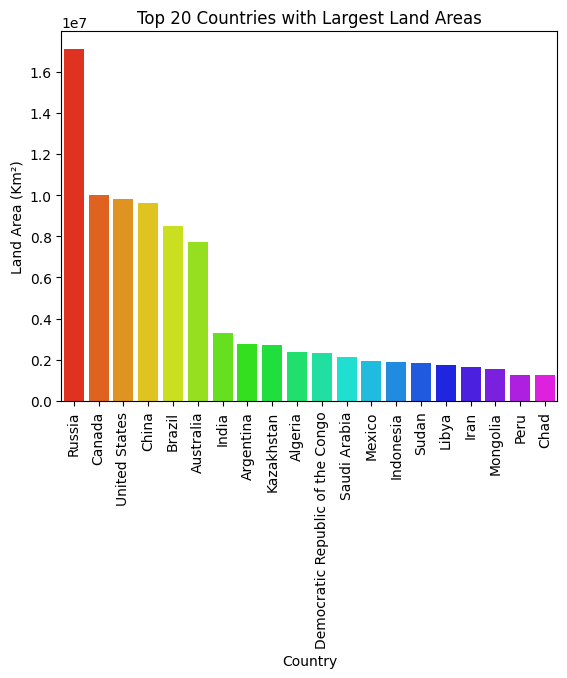

In [11]:
# Step 02: Sort the dataframe by 'Land Area(Km2)' column in descending order
sorted_df = df.sort_values(by='Land Area(Km2)', ascending=False)

# Step 03: Get the top 20 countries with the largest land areas
top_land_area_countries = sorted_df.head(20)
top_land_vs_population_countries = sorted_df.head(20)
# Create subplots for both bar plot and scatter plot

# Bar plot of top countries with largest land areas
sns.barplot(data=top_land_area_countries, x='Country', y='Land Area(Km2)', palette='gist_rainbow')
plt.title('Top 20 Countries with Largest Land Areas')
plt.xlabel('Country')
plt.ylabel('Land Area (Km²)')
plt.xticks(rotation = 90)

# Show the plots

plt.show()


Top 20 Countries: Highest CO2 Emmision

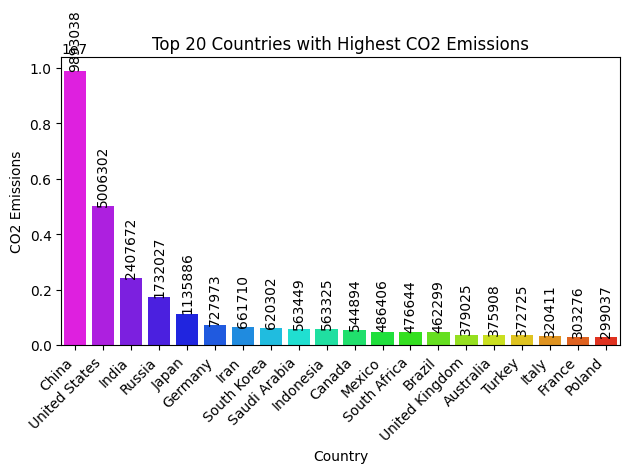

In [12]:
# Sort the DataFrame by CO2 emissions column in descending order and get the top 20 rows
top_co2_emissions_countries = df.sort_values(by='Co2-Emissions', ascending=False).head(20)

# Create a bar plot to visualize CO2 emissions for top countries
sns.barplot(data=top_co2_emissions_countries, x='Country', y='Co2-Emissions', palette='gist_rainbow_r')
plt.title('Top 20 Countries with Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45, ha='right')

for index , value in enumerate(top_co2_emissions_countries['Co2-Emissions']):
    # plt.text(index, value, f'{value:.0f}', ha = 'center',va = 'bottom', fontsize = 10, rotation = 45)
    plt.text(index, value,f'{value:.0f}',ha = 'center',va = 'bottom', fontsize = 10, rotation = 90)
plt.tight_layout()
plt.show()



Top 20 Countries: Low Infant Mortality

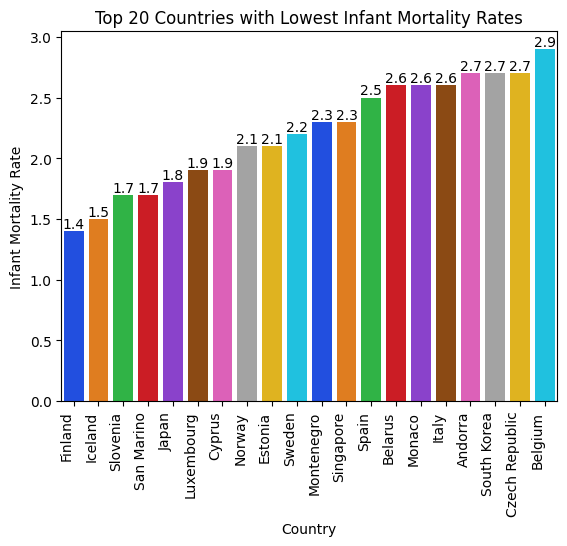

In [13]:
# Sort the DataFrame by infant mortality column in ascending order and get the top 20 rows
top_infant_mortality_countries = df.sort_values(by='Infant mortality', ascending=True).head(20)

# Create a bar plot to visualize infant mortality rates for top countries
sns.barplot(data=top_infant_mortality_countries, x='Country', y='Infant mortality', palette='bright')
plt.title('Top 20 Countries with Lowest Infant Mortality Rates')
plt.xlabel('Country')
plt.ylabel('Infant Mortality Rate')
plt.xticks(rotation=90, ha='right')

for index, value in enumerate(top_infant_mortality_countries['Infant mortality']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)  # Rotate text
  




Top 20 Countries: High Infant Mortality

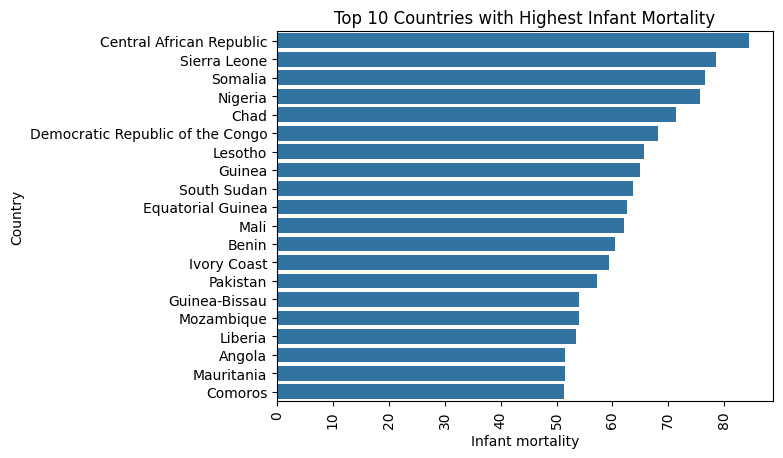

In [14]:
top_infant_mortality = df.sort_values(by='Infant mortality', ascending=False).head(20)
sns.barplot(x='Infant mortality', y='Country', data=top_infant_mortality)
plt.title('Top 10 Countries with Highest Infant Mortality')
plt.xticks(rotation=90)
plt.show()



Top 20 Countries: Highest GDP

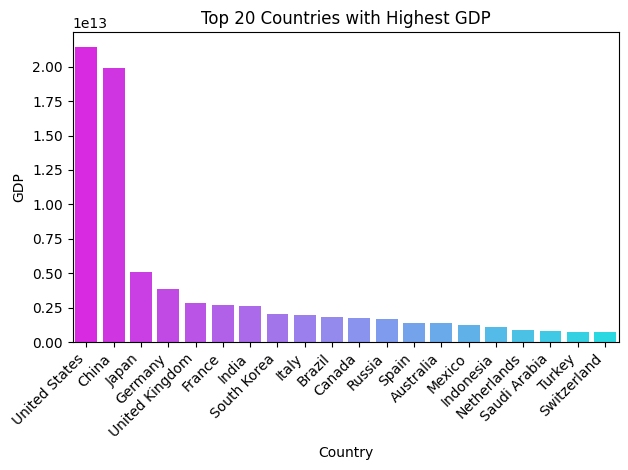

In [15]:
# Sort the DataFrame by GDP column in descending order and get the top 20 rows
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

# Create a bar plot to visualize GDP for top countries
sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')




plt.tight_layout()
plt.show()




Top 20 Countries: Highest Tertiary Education Enrollment Rates

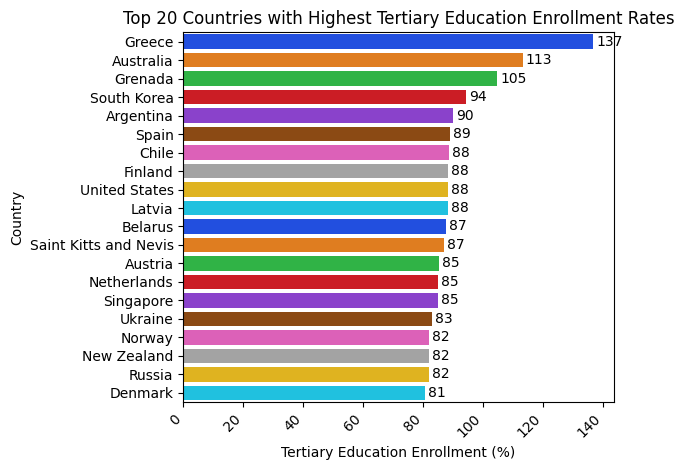

In [16]:
# Sort the DataFrame by gross tertiary education enrollment column in descending order and get the top 20 rows
top_tertiary_enrollment_countries = df.sort_values(by='Gross tertiary education enrollment (%)', ascending=False).head(20)

# Create a bar plot to visualize tertiary education enrollment for top countries
ax = sns.barplot(data=top_tertiary_enrollment_countries, x='Gross tertiary education enrollment (%)', y='Country', palette='bright')
plt.title('Top 20 Countries with Highest Tertiary Education Enrollment Rates')
plt.xlabel('Tertiary Education Enrollment (%)')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the exact tertiary enrollment value using plt.text
for index, value in enumerate(top_tertiary_enrollment_countries['Gross tertiary education enrollment (%)']):
    ax.text(value + 1, index, f'{value:.0f}', va='center', color='black')

plt.tight_layout()
plt.show()



Countries by Top Languages

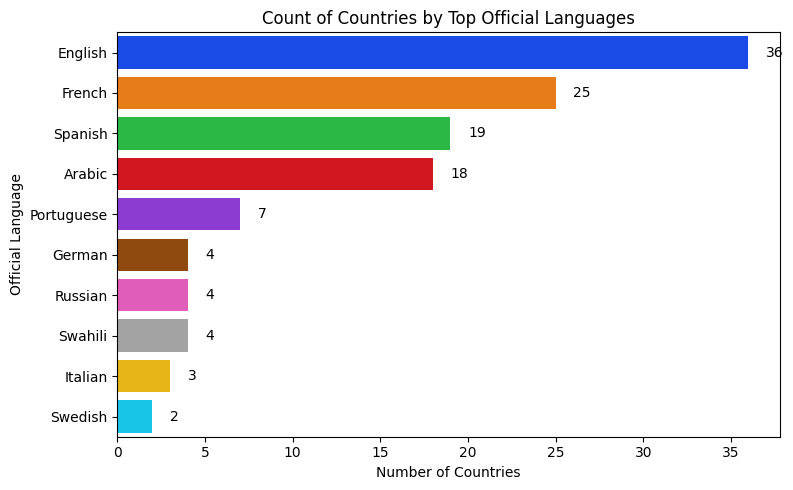

In [17]:
# Specify the number of top languages to display
top_languages_count = 10

# Get the top N official languages
top_languages = df['Official language'].value_counts().nlargest(top_languages_count).index

# Filter the DataFrame to include only the top languages
df_top_languages = df[df['Official language'].isin(top_languages)]

# Count of Countries by Top Official Languages
plt.figure(figsize=(8, 5))
sns.countplot(data=df_top_languages, y='Official language', order=df_top_languages['Official language'].value_counts().index, palette='bright', saturation=0.8)
plt.title('Count of Countries by Top Official Languages')
plt.xlabel('Number of Countries')
plt.ylabel('Official Language')
plt.tight_layout()

# Add annotations to the bars
for index, value in enumerate(df_top_languages['Official language'].value_counts()):
    plt.text(value + 1, index, f'{value}', va='center')

plt.show()


Top 20 CPI Change (%): Currency Code

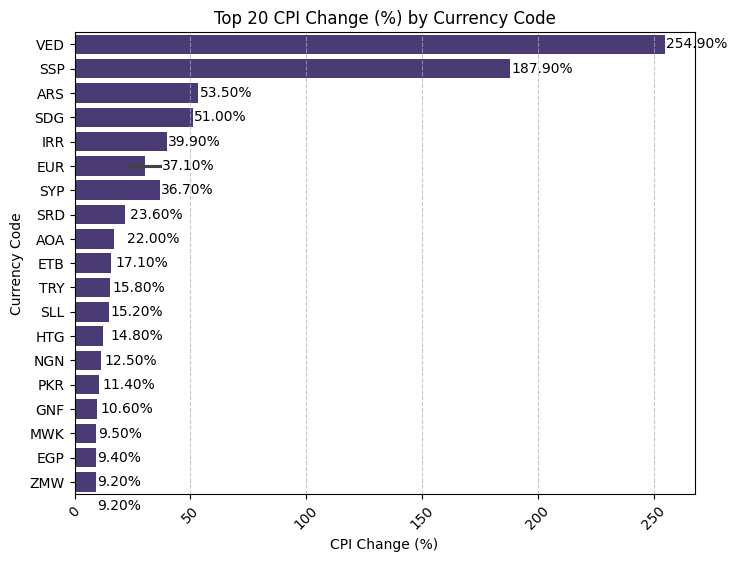

In [18]:
# Select top N currencies with the highest CPI changes
top_n_currencies = 20
top_currencies = df.nlargest(top_n_currencies, 'CPI Change (%)')

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.set_palette("viridis")  # Use a color palette for better distinction
sns.barplot(x='CPI Change (%)', y='Currency-Code', data=top_currencies)
plt.title('Top {} CPI Change (%) by Currency Code'.format(top_n_currencies))
plt.xlabel('CPI Change (%)')
plt.ylabel('Currency Code')
plt.xticks(rotation=45)  # Rotate currency code labels for better readability

# Add data labels to the bars
for index, value in enumerate(top_currencies['CPI Change (%)']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Add horizontal grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Urbanization Trends by Country

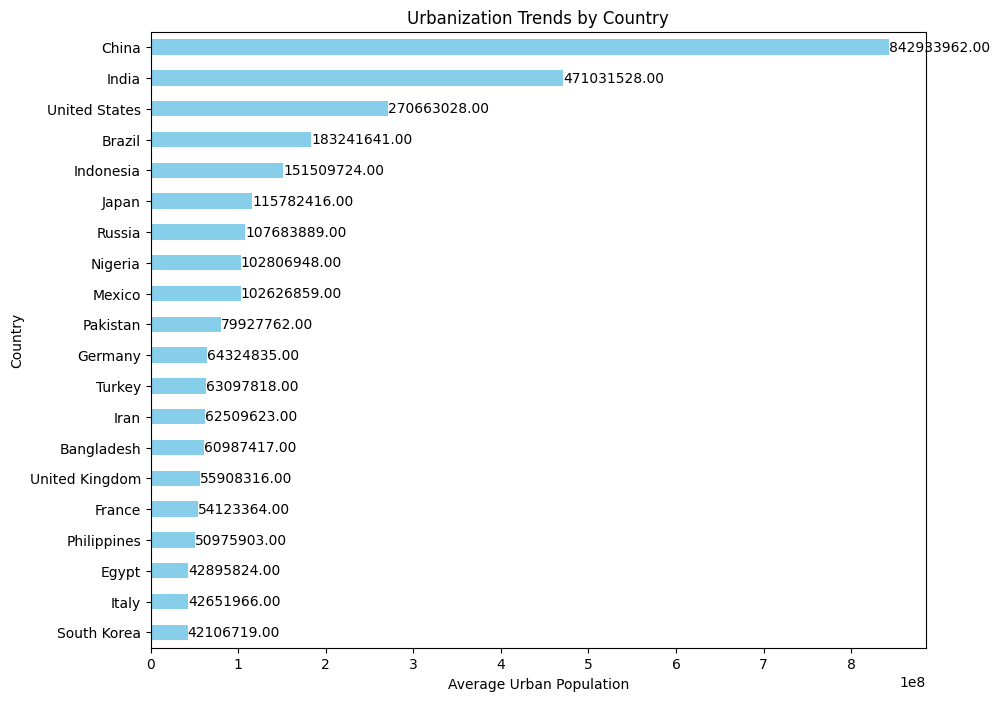

In [19]:
subset_countries = 20  # Number of top countries to display
urbanization_by_country = df.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(subset_countries)

plt.figure(figsize=(10, 8))
ax = urbanization_by_country.plot(kind='barh', color='skyblue')
plt.title('Urbanization Trends by Country')
plt.xlabel('Average Urban Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Add data labels to the bars
for index, value in enumerate(urbanization_by_country):
    ax.text(value + 2, index, f'{value:.2f}', va='center', color='black')  # Display values on a separate axis

plt.show()



Population Density Distribution

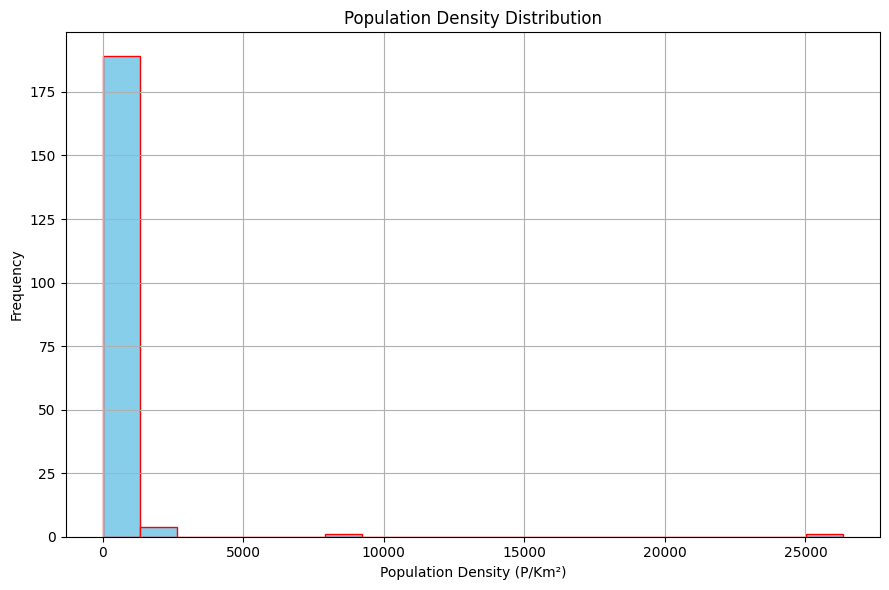

In [20]:
plt.figure(figsize=(9, 6))
plt.hist(df['Density\n(P/Km2)'], bins=20, color='skyblue', edgecolor='red')
plt.title('Population Density Distribution')
plt.xlabel('Population Density (P/Km²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Distribution of Life Expectancy

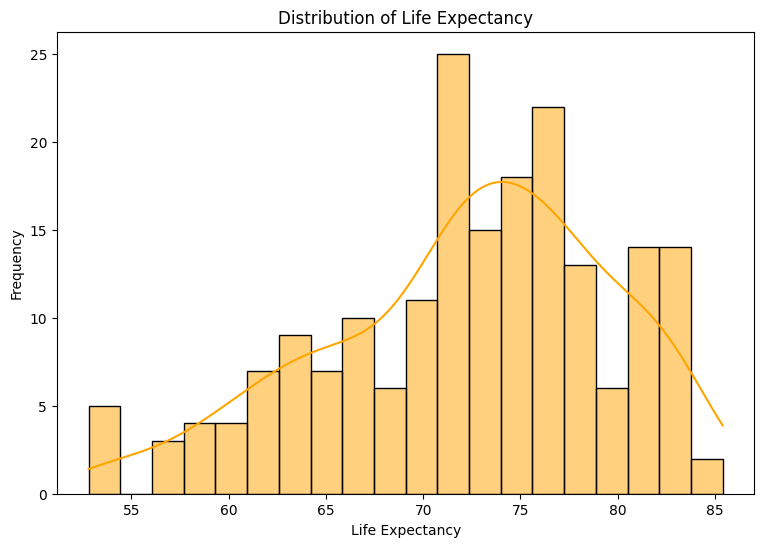

In [21]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Life expectancy', bins=20, kde=True, color='Orange')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


Distribution of Birth Rates

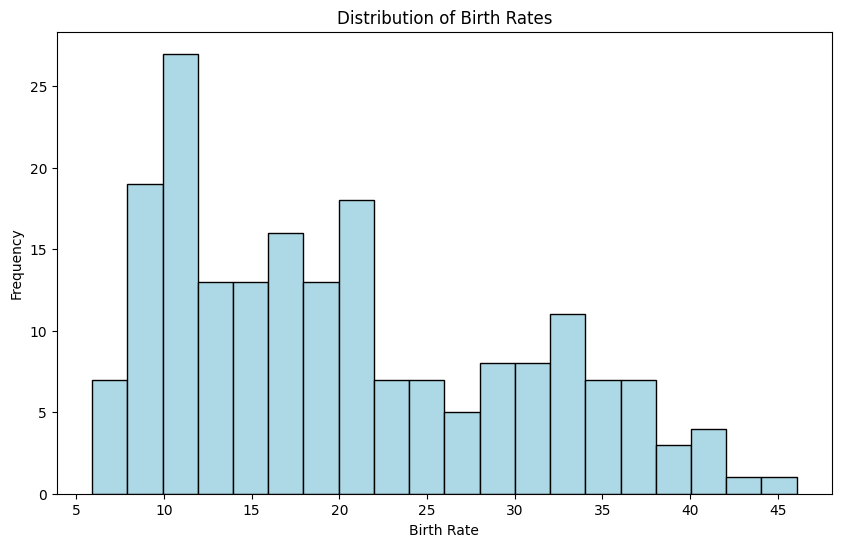

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Birth Rate'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.show()


Urban Population Distribution

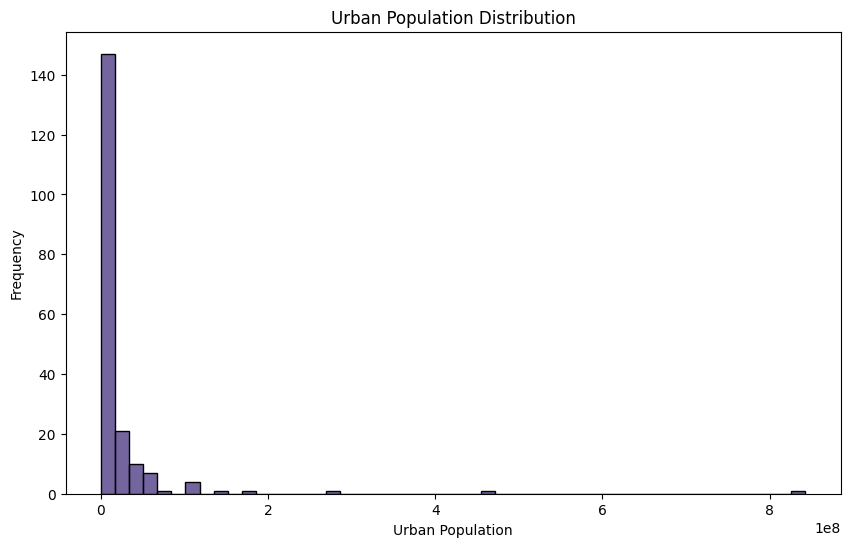

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Urban_population'], bins=50)
plt.title('Urban Population Distribution')
plt.xlabel('Urban Population')
plt.ylabel('Frequency')
plt.show()


Distribution of Country Codes

In [24]:
# Get the top N currency codes (e.g., top 10)
top_n_currency = 10
currency_counts = df['Currency-Code'].value_counts().head(top_n_currency)

# Calculate the sum of remaining counts
remaining_counts = df['Currency-Code'].value_counts().sum() - currency_counts.sum()

# Create a new Series for the top currency codes and an "Other" category
currency_counts = currency_counts.append(pd.Series([remaining_counts], index=['Other']))

# Plot the pie chart
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow_r"))
plt.title('Distribution of Currency Codes')
plt.axis('equal')
plt.tight_layout()
plt.show()


AttributeError: 'Series' object has no attribute 'append'

Economic Indicators Scatter Matrix

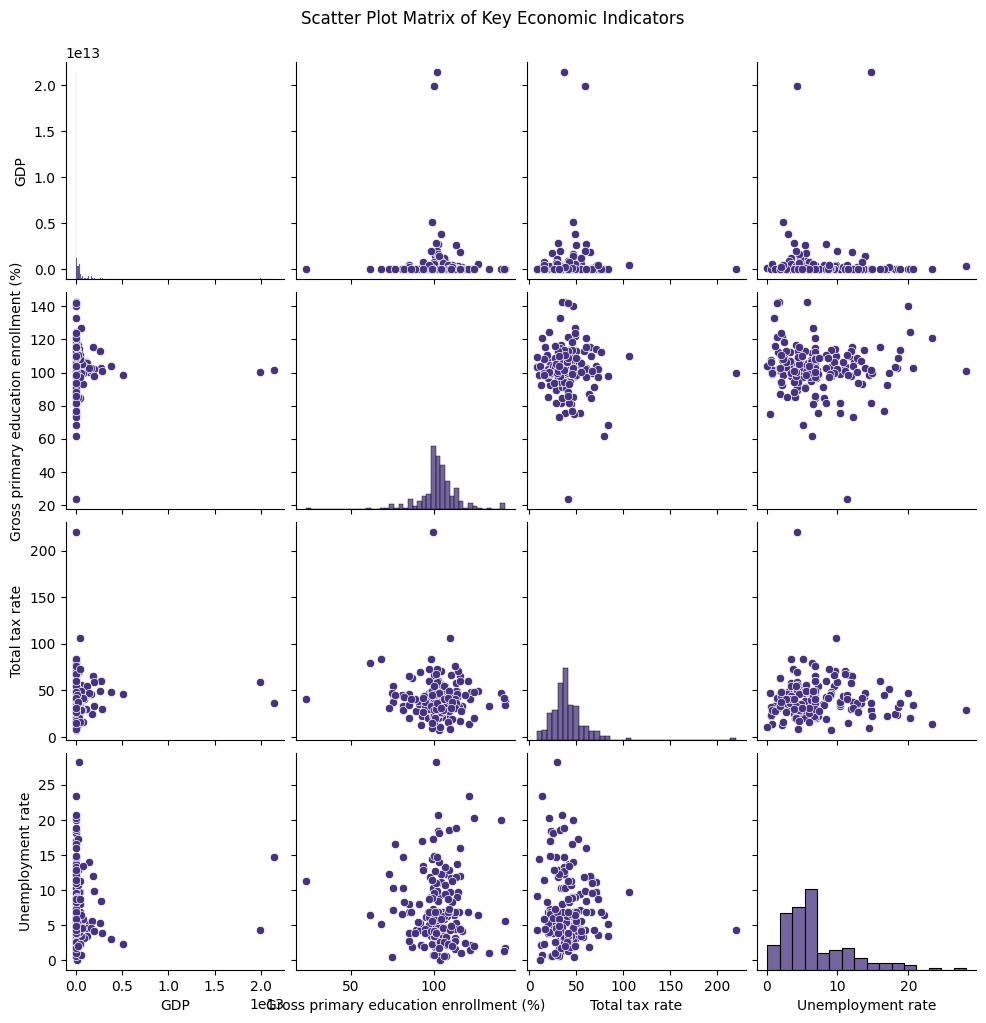

In [25]:
economic_indicators = df[['GDP', 'Gross primary education enrollment (%)', 'Total tax rate', 'Unemployment rate']]
sns.pairplot(economic_indicators)
plt.suptitle('Scatter Plot Matrix of Key Economic Indicators', y=1.02)
plt.show()



Birth Rate vs GDP

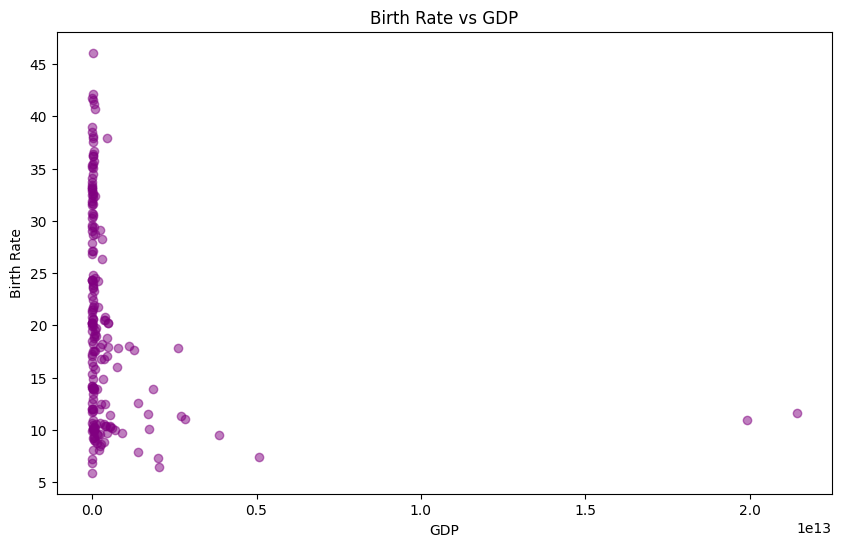

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Birth Rate'], color='purple', alpha=0.5)
plt.title('Birth Rate vs GDP')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()


Global Distribution of Countries

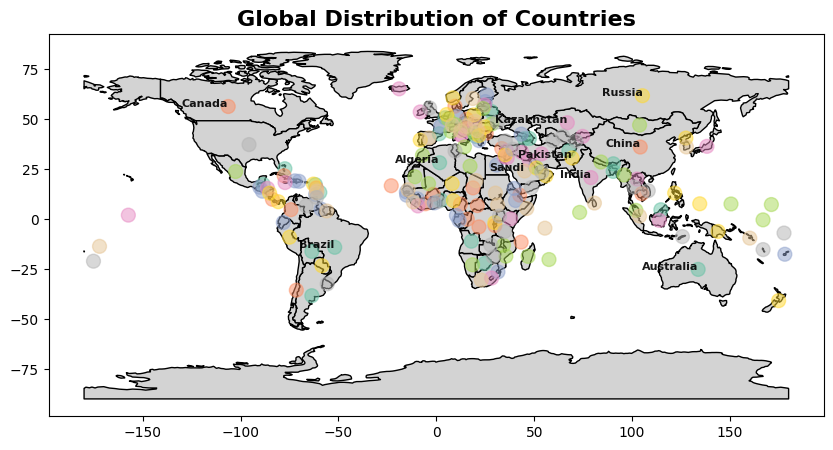

In [28]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# World map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot country points with a color map
scatter = gdf.plot(ax=ax, markersize=100, legend=True, cmap='Set2', alpha=0.5, categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})

# Annotate country names
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Country']):
    if label in ['United States of America', 'Canada', 'Russia',
                 'China', 'Australia','Pakistan','India','Brazil', 'Kazakhstan','Algeria', 'Saudi Arabia']:
        ax.text(x, y, label.split(' ')[0], fontsize=8, ha='right', color='black', weight='bold', alpha=0.9)
    else:
        ax.text(x, y, '', fontsize=8, ha='right', color='darkslategrey', weight='bold', alpha=0.7)

# Set a title
plt.title('Global Distribution of Countries', fontsize=16, fontweight='bold')





# Display the plot
plt.show()
